In [364]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [365]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [366]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [367]:
def file_get_contents(filename):
    with open(filename) as f:
        return f.read()

In [368]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import json
import re

file_analyse_name = "ALEXIS PEDRÃO_260001087378"
#file_analyse_name = "MÁRCIO MACEDO_260000958767"
#file_analyse_name = "ALMEIDA LIMA_260000935642"
#file_analyse_name = "DELEGADO PAULO MARCIO_260001037485"
#file_analyse_name = "GEORLIZE_260000835177"
#file_analyse_name = "GILVANI SANTOS_260000935814"
#file_analyse_name = "JURACI NUNES_260000743434"
file_analyse_name = "LÚCIO FLÁVIO_260000857748"
#file_analyse_name = "RODRIGO VALADARES_260001065879"

## Tf-idf com 0
#file_analyse_name = "EDVALDO_260000983413"
#file_analyse_name = "DELEGADA DANIELLE_260000637328"

#file_analyse_name = "EDVALDO_260000983413"
file_json_contents = file_get_contents("./files_parseds/" + file_analyse_name + ".json")
json_data = json.loads(file_json_contents)
content_pages = [re.sub(r'[0-9]', '', content["text"]) for content in json_data["content"]]

In [369]:
stop_words = ["aracaju","de","a","o","que","e","do","da","em","um","para","é", "etc","com","não","uma","os","no","se","na","por","mais","as","dos","como","mas","foi","ao","ele","das","tem","à","seu","sua","ou","ser","quando","muito","há","nos","já","está","eu","também","só","pelo","pela","até","isso","ela","entre","era","depois","sem","mesmo","aos","ter","seus","quem","nas","me","esse","eles","estão","você","tinha","foram","essa","num","nem","suas","meu","às","minha","têm","numa","pelos","elas","havia","seja","qual","será","nós","tenho","lhe","deles","essas","esses","pelas","este","fosse","dele","tu","te","vocês","vos","lhes","meus","minhas","teu","tua","teus","tuas","nosso","nossa","nossos","nossas","dela","delas","esta","estes","estas","aquele","aquela","aqueles","aquelas","isto","aquilo","estou","está","estamos","estão","estive","esteve","estivemos","estiveram","estava","estávamos","estavam","estivera","estivéramos","esteja","estejamos","estejam","estivesse","estivéssemos","estivessem","estiver","estivermos","estiverem","hei","há","havemos","hão","houve","houvemos","houveram","houvera","houvéramos","haja","hajamos","hajam","houvesse","houvéssemos","houvessem","houver","houvermos","houverem","houverei","houverá","houveremos","houverão","houveria","houveríamos","houveriam","sou","somos","são","era","éramos","eram","fui","foi","fomos","foram","fora","fôramos","seja","sejamos","sejam","fosse","fôssemos","fossem","for","formos","forem","serei","será","seremos","serão","seria","seríamos","seriam","tenho","tem","temos","tém","tinha","tínhamos","tinham","tive","teve","tivemos","tiveram","tivera","tivéramos","tenha","tenhamos","tenham","tivesse","tivéssemos","tivessem","tiver","tivermos","tiverem","terei","terá","teremos","terão","teria","teríamos","teriam"]
tfIdfVectorizer=TfidfVectorizer(
    max_df=0.8,
    min_df=0.2,
    stop_words=stop_words,
    use_idf=True,
    ngram_range=(1,2),
    #max_features=100
)
tfIdf = tfIdfVectorizer.fit_transform(content_pages)

In [370]:
# Analisar este caso para a exibição dos idfs 0
df = []
top_ten_sentences_per_page = []

for tf in tfIdf:
  frame = pd.DataFrame(tf.T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
  frame = frame.sort_values('TF-IDF', ascending=False)
  top_ten_sentences = frame.head(10)
  top_ten = pd.DataFrame()
  top_ten['Sentence'] = top_ten_sentences.index
  top_ten['TF-IDF'] = top_ten_sentences['TF-IDF'].tolist()
  top_ten_sentences_per_page.append(top_ten)
  df.append(frame)

print(len(top_ten_sentences_per_page))
print(top_ten_sentences_per_page)

3
[         Sentence    TF-IDF
0           saúde  0.227026
1        educação  0.227026
2         governo  0.115106
3      tratamento  0.113513
4  saúde educação  0.075675
5        crianças  0.075675
6     ultrapassar  0.075675
7           capaz  0.075675
8          pontos  0.075675
9           plano  0.075675,        Sentence    TF-IDF
0  equipamentos  0.151454
1      proteção  0.151454
2    atividades  0.113590
3         outro  0.113590
4       turismo  0.113590
5        guarda  0.113590
6     segurança  0.113590
7     turístico  0.113590
8     municipal  0.086388
9      públicos  0.075727,    Sentence    TF-IDF
0  respeito  0.104397
1     todos  0.104397
2    número  0.104397
3    cidade  0.104397
4   retorno  0.091513
5  garantir  0.091513
6    dentro  0.091513
7     geral  0.091513
8   pessoas  0.091513
9   cuidado  0.091513]


/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [371]:
sentences_tfidf_no_zero_dictionary = {}
text_database = []

for df_word in df:
    for sentence, row in df_word.iterrows():
        text_instance = {}
        text_instance['sentence'] = sentence
        text_instance['tf-idf'] = row["TF-IDF"]

        if row["TF-IDF"] > 0:
            sentences_tfidf_no_zero_dictionary[sentence] = row["TF-IDF"]
        text_database.append(text_instance)

#print(sentences_tfidf_no_zero_dictionary)
#print(text_database)

In [372]:
tfIdf.shape

(3, 1523)

In [373]:
dataframe_texts =  pd.DataFrame(text_database)
dataframe_texts

,sentence,tf-idf
0,saúde,0.227026
1,educação,0.227026
2,governo,0.115106
3,tratamento,0.113513
4,saúde educação,0.075675
...,...,...
4564,estímulo casa,0.000000
4565,estímulo,0.000000
4566,estudo trabalho,0.000000
4567,estudo jurídico,0.000000


In [379]:
# Imports necessários
from sklearn.cluster import KMeans
from sklearn import metrics

# Variando o número de k de 1 a 10 para analisar os valores da métrica

for k in range(2, 10):
  km = KMeans(n_clusters=k,random_state=42)
  km.fit(tfIdf)
  score = metrics.silhouette_score(tfIdf, km.labels_, metric='euclidean')
  print("Para k=%i o valor Silhoutte foi de %.4f" % (k, score))

Para k=2 o valor Silhoutte foi de 0.0043


ValueError: Number of labels is 3. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
km = KMeans(n_clusters=5,random_state=42)
clusters_km = km.fit_predict(tfIdf)
clusters_km

array([3, 1, 1, 3, 0, 4, 0, 0, 0, 2, 2, 2, 0, 0, 4, 4, 1, 3], dtype=int32)

In [ ]:
dataframe_texts['clusters_km'] = pd.Series(clusters_km)
dataframe_texts


,sentence,tf-idf,clusters_km
0,futuro,0.574956,3.0
1,governo,0.492105,1.0
2,municipais,0.492105,1.0
3,plano,0.430223,3.0
4,município,0.000000,0.0
...,...,...,...
1381,inclusive,0.000000,NaN
1382,meio,0.000000,NaN
1383,além,0.000000,NaN
1384,melhoria,0.000000,NaN


In [ ]:
pages_in_clusters = {}
for i in range(0, len(clusters_km)):
  page = i + 1
  cluster = clusters_km[i]

  if cluster in pages_in_clusters:
    pages_in_clusters[cluster].append(page)
  else:
    pages_in_clusters[cluster] = [page] 
  

pages_in_clusters = dict(sorted(pages_in_clusters.items()))
pages_in_clusters

{0: [5, 7, 8, 9, 13, 14],
 1: [2, 3, 17],
 2: [10, 11, 12],
 3: [1, 4, 18],
 4: [6, 15, 16]}

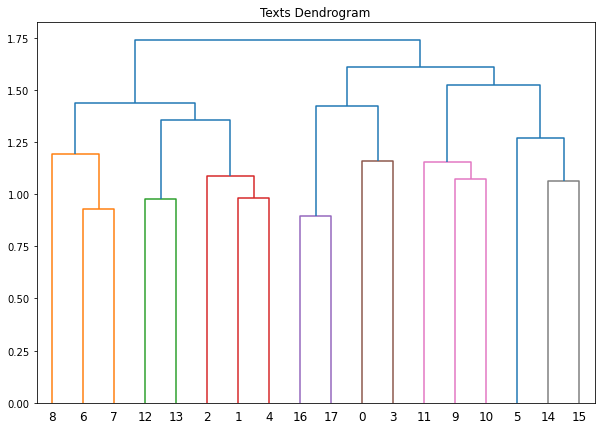

In [ ]:
# Imports necessários
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Criando e plotando o dendrograma
plt.figure(figsize=(10, 7))
plt.title("Texts Dendrogram")
cluster_alg = shc.linkage(tfIdf.toarray(), method='ward',)
dend = shc.dendrogram(cluster_alg)


In [ ]:
# Imports Necessários
from sklearn.cluster import AgglomerativeClustering

# Criação do Cluster
agg_cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
clusters_agg = agg_cluster.fit_predict(tfIdf.toarray())
clusters_agg

array([2, 4, 4, 2, 4, 0, 1, 1, 1, 3, 3, 3, 6, 6, 0, 0, 5, 5])

In [ ]:
dataframe_texts['cluster_agg'] = pd.Series(clusters_agg)
dataframe_texts

,sentence,tf-idf,clusters_km,cluster_agg
0,futuro,0.574956,3.0,2.0
1,governo,0.492105,1.0,4.0
2,municipais,0.492105,1.0,4.0
3,plano,0.430223,3.0,2.0
4,município,0.000000,0.0,4.0
...,...,...,...,...
1381,inclusive,0.000000,NaN,NaN
1382,meio,0.000000,NaN,NaN
1383,além,0.000000,NaN,NaN
1384,melhoria,0.000000,NaN,NaN


In [ ]:
## Limpar valores NaN para 0

dataframe_texts = dataframe_texts.fillna(0)
dataframe_texts

,sentence,tf-idf,clusters_km,cluster_agg
0,futuro,0.574956,3.0,2.0
1,governo,0.492105,1.0,4.0
2,municipais,0.492105,1.0,4.0
3,plano,0.430223,3.0,2.0
4,município,0.000000,0.0,4.0
...,...,...,...,...
1381,inclusive,0.000000,0.0,0.0
1382,meio,0.000000,0.0,0.0
1383,além,0.000000,0.0,0.0
1384,melhoria,0.000000,0.0,0.0


In [ ]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
order_centroids

array([[67, 15, 64, 13, 42, 49, 55, 50, 68, 37, 46, 10, 20, 45,  8, 24,
        27,  4, 75,  7, 53, 65, 39, 61, 34, 58, 54, 63, 17, 69,  1, 25,
         5, 48, 31, 47,  6, 36, 44, 74, 29, 76, 19,  2, 38, 56, 12, 60,
        72, 32, 57, 35, 14, 22, 28, 52, 59,  9, 43,  3, 21, 70, 66, 33,
        40, 71, 73, 62, 26, 11, 30, 16, 18, 51, 23, 41,  0],
       [32, 62, 13, 42,  6, 38, 48, 58, 33, 66,  0, 41, 55, 36, 12, 34,
         8, 27, 74, 30, 57, 43, 75, 28, 73, 51, 54, 63, 40, 18,  2, 60,
        61, 65, 67, 11,  1, 71, 10, 64, 72, 56, 24, 17, 47,  4,  3, 16,
        23, 31, 26, 59, 76, 46, 25, 52, 39, 68, 70, 44,  5, 29,  7, 53,
         9, 50, 22, 49, 69, 14, 15, 45, 37, 19, 20, 21, 35],
       [22, 23, 53, 44, 43, 59, 39, 13, 45, 15, 30, 70, 42, 40, 51,  3,
         4, 37, 46, 76, 34, 28, 69,  9,  5,  0, 41, 75,  1, 12,  7, 73,
        72, 17, 35, 16, 71, 18, 60, 54, 47, 63, 26, 52, 36, 32, 67, 14,
        68, 10, 11,  6,  2,  8, 74, 19, 50, 25, 20, 33, 48, 55, 56, 57,
        58, 61

In [ ]:
# Criação de uma variável com a lista de palavras que representa as colunas da matriz.
terms = tfIdfVectorizer.get_feature_names_out()

In [ ]:
terms

array(['acesso', 'além', 'aracajuano', 'aracajuanos', 'assim',
       'atividades', 'atual', 'ações', 'brasil', 'buscando', 'capital',
       'casa', 'chegou', 'cidade', 'controle', 'criação', 'demais',
       'desenvolvimento', 'direitos', 'econômica', 'efetivo', 'empresas',
       'escolar', 'escolas', 'estado', 'estadual', 'família', 'fazer',
       'federal', 'fomento', 'futuro', 'garantir', 'gestão',
       'gestão municipal', 'governo', 'implantação', 'inclusive', 'meio',
       'melhor', 'melhoria', 'ministério', 'municipais', 'municipal',
       'município', 'oportunidades', 'parceria', 'parcerias', 'plano',
       'população', 'privada', 'privado', 'programa', 'projeto',
       'promoção', 'propostas', 'pública', 'público', 'públicos',
       'qualidade', 'rede', 'referência', 'ruas', 'saúde', 'seguintes',
       'segurança', 'sergipe', 'serviços', 'setor', 'setor privado',
       'sistema', 'situação', 'social', 'trabalho', 'unidades', 'vida',
       'visando', 'área'], dtype

In [ ]:
centroids = []
# 5 foi o número de clusters que usamos para treinar o modelo do K-Means
for i in range(5):
  list_id = order_centroids[i]
  list_terms = [terms[id] for id in list_id[:10]]
  pages = [str(page) for page in pages_in_clusters[i]]
  centroids.append({'cluster': i, 'words': ', '.join(list_terms), 'pages': pages})

df_centroids = pd.DataFrame(centroids)
df_centroids

,cluster,words,pages
0,0,"setor, criação, segurança, cidade, municipal, ...","[5, 7, 8, 9, 13, 14]"
1,1,"gestão, saúde, cidade, municipal, atual, melho...","[2, 3, 17]"
2,2,"escolar, escolas, promoção, oportunidades, mun...","[10, 11, 12]"
3,3,"municipais, saúde, implantação, plano, futuro,...","[1, 4, 18]"
4,4,"programa, social, direitos, garantir, projeto,...","[6, 15, 16]"


In [ ]:
import json 

results_saves = []

for cluster_data in centroids:
  words = cluster_data['words']
  pages = cluster_data['pages']
  content = {'keywords': words, 'pages_relationeds': pages, 'data': []}

  for page_number in pages:
    page_index = int(page_number) - 1
    content['data'].append(content_pages[page_index])
  
  results_saves.append(content)


file = open("./files_analyseds/" + file_analyse_name + ".json", 'w')
file.write(json.dumps(results_saves))
file.close()

In [ ]:
for n in range(5):
  print("Cluster %i: %s" % (n, list(df_centroids[df_centroids['cluster'] == n]['words'][:5])))
  data_selected = dataframe_texts[dataframe_texts['clusters_km'] == n]
  for index, row in data_selected.head(10).iterrows():
    print("sentence: %s" % row['sentence'])
  print()

Cluster 0: ['setor, criação, segurança, cidade, municipal, privada, pública, privado, setor privado, meio']
sentence: município
sentence: municipal
sentence: parceria
sentence: parcerias
sentence: privado
sentence: programa
sentence: público
sentence: acesso
sentence: ministério
sentence: setor privado

Cluster 1: ['gestão, saúde, cidade, municipal, atual, melhor, população, qualidade, gestão municipal, serviços']
sentence: governo
sentence: municipais
sentence: propostas

Cluster 2: ['escolar, escolas, promoção, oportunidades, município, rede, melhoria, cidade, parceria, criação']
sentence: públicos
sentence: população
sentence: privada

Cluster 3: ['municipais, saúde, implantação, plano, futuro, controle, municipal, governo, criação, unidades']
sentence: futuro
sentence: plano
sentence: pública

Cluster 4: ['programa, social, direitos, garantir, projeto, demais, fomento, empresas, privada, meio']
sentence: oportunidades
sentence: projeto
sentence: promoção



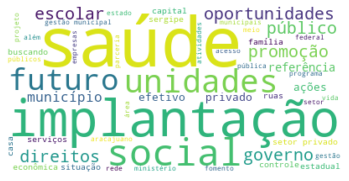

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

if len(sentences_tfidf_no_zero_dictionary) > 0:
  words_cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(sentences_tfidf_no_zero_dictionary)

  plt.imshow(words_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
else:
  print("Sem palavras com TF-IDF diferente de zero")